
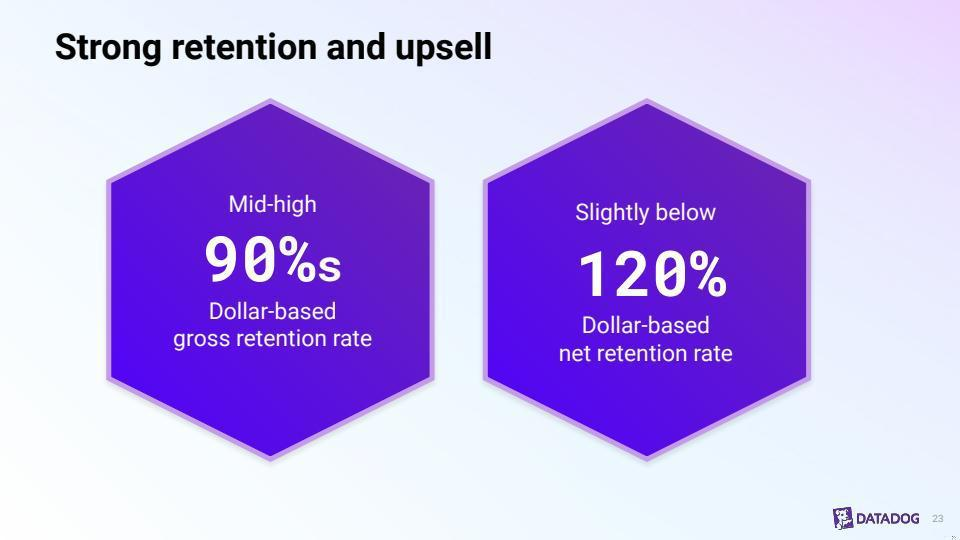

'103%'

In [4]:

from langchain.llms import Ollama

bakllava = Ollama(model="bakllava")

import base64
from io import BytesIO

from IPython.display import HTML, display
from PIL import Image


def convert_to_base64(pil_image):
    """
    Convert PIL images to Base64 encoded strings

    :param pil_image: PIL image
    :return: Re-sized Base64 string
    """

    buffered = BytesIO()
    pil_image.save(buffered, format="JPEG")  # You can change the format if needed
    img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")
    return img_str


def plt_img_base64(img_base64):
    """
    Disply base64 encoded string as image

    :param img_base64:  Base64 string
    """
    # Create an HTML img tag with the base64 string as the source
    image_html = f'<img src="data:image/jpeg;base64,{img_base64}" />'
    # Display the image by rendering the HTML
    display(HTML(image_html))


path = input("Enter the image path> ")
pil_image = Image.open(path)
image_b64 = convert_to_base64(pil_image)
plt_img_base64(image_b64)

llm_with_image_context = bakllava.bind(images=[image_b64])

cmd = input("what is your prompt >")

llm_with_image_context.invoke(cmd)

